In [1]:
import matplotlib.pyplot as plt
import scipy.io
import numpy as np
from scipy.optimize import curve_fit
data = np.load('data.npy').item()
k_boltz = 8.6173303E-5
plt.rcParams.update({'font.size': 8})
%matplotlib inline

In [2]:
# get the data
wavelength = data['wavelength']
spec_532 = data['532 spectrum']
spec_532_bkg = data['532 bkg']
spec_633 = data['633 spectra']
spec_633_bkg = data['633 bkg']
power_sp = data['633 power']

def lorentziana(xdata, C0, C1, C2, C3):
    return C0/((xdata - C1)**2 + C2) + C3

def temp_fitting(xdata, T0, T1):
    return lorentziana(xdata,P[0], P[1], P[2], P[3])*T0/(np.exp((xdata-1.9586)/(k_boltz*T1))-1)

# Initial guess for the fit (found in the matlab files...)
P = [  3.42368012e+05,   1239.8/6.06514423e+02,   1239.8/9.32145559e+02,    -1.87937746e+01]

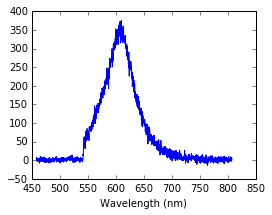

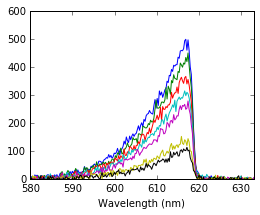

In [3]:
# see the data
f = plt.figure(figsize=(4,3), dpi=600)
plt.plot(wavelength, spec_532-spec_532_bkg)
plt.xlabel('Wavelength (nm)')
plt.show()

f2 = plt.figure(figsize=(4,3), dpi=600)
plt.plot(wavelength, spec_633-spec_633_bkg)
plt.xlabel('Wavelength (nm)')
plt.ylim((0,600))
plt.xlim((580,633))
plt.show()

In [4]:
# export 532nm spectra to a txt file
# TO_SAVE = np.zeros(2,len(wavelength))
# TO_SAVE[1,:]=wavelength
# TO_SAVE[2,:]= spec_532-spec_532_bkg
#np.savetxt('aS532nm_spectra.txt',(np.transpose(wavelength),np.transpose(spec_532-spec_532_bkg)))

In [5]:
# export 633nm spectra to a txt file
#for n in range(0,len(power_sp)):
#    np.savetxt('aS633nm_spectra_pw='+str(power_sp[n])+'.txt',(np.transpose(wavelength),np.transpose(spec_633[:,n]-spec_633_bkg[:,n])))


### get the estimate SPR and width from the max and max/2 values
Here I calculate the SPR simply by taking the center of mass
Then I find the value when the curve goes to half the maxium, looking only to the red side from the max.

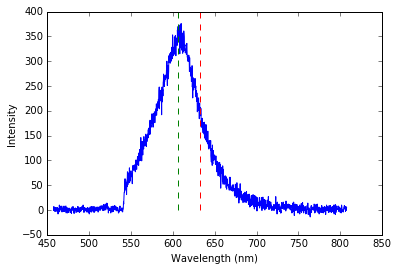

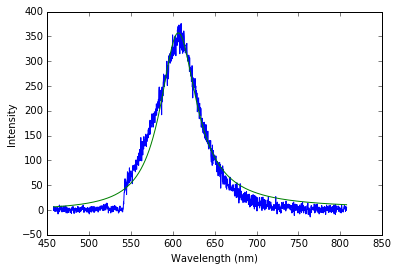

SPR value =  (606.460 +/- 0.263)  nm
SPR Width =  (52.818 +/- 0.526)  nm
SPR value = 2.044 eV
SPR Width = 0.178 eV


In [6]:
# get spr
d = spec_532-spec_532_bkg

ind = np.where(d>np.max(d)*0.8)
x = d[ind]
center_of_mass = (x*np.arange(len(x))).sum()/x.sum()

#f = plt.figure()
#plt.plot(x)
#plt.plot([center_of_mass,center_of_mass],[np.max(d)*0.8,np.max(d)])
ind_max = int(ind[0][0])+int(np.floor(center_of_mass))
SPR = wavelength[ind_max]
eSPR = wavelength[1]-wavelength[0]
signal = np.mean(d[range(int(ind[0][0]+np.floor(center_of_mass)-5),int(ind[0][0]+np.floor(center_of_mass)+5))])
           
# get width
ind_wid = np.argmin(abs(d[wavelength>SPR]-np.max(d[wavelength>SPR])/2))+ind_max
W = 2*(wavelength[ind_wid]-SPR)
eW = 2*eSPR

f = plt.figure()
plt.plot(wavelength, d)
plt.plot([SPR,SPR],[0,400],'--')
plt.plot([SPR+W/2,SPR+W/2],[0,400],'--r')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()


We = 1239.8*W/SPR**2
f = plt.figure()
plt.plot(wavelength, d)
plt.plot(wavelength, lorentziana(1239.8/wavelength, signal*We**2/4, 1239.8/SPR, We**2/4, 0))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()



print('SPR value =  ({0:.3f} +/- {1:.3f})  nm'.format(SPR, eSPR) )
print('SPR Width =  ({0:.3f} +/- {1:.3f})  nm'.format(W, eW) )

SPRe = 1239.8/SPR
print('SPR value = {0:.3f} eV'.format(SPRe) )
print('SPR Width = {0:.3f} eV'.format(We) )

    

SPR width = (0.180  +/- 0.002)eV


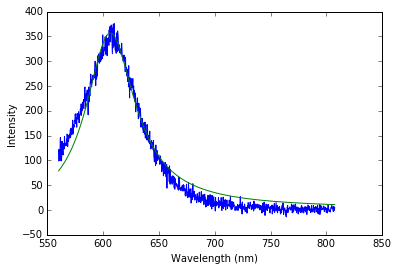

In [7]:
# fit a lorentzian with a fixed center and duplicated data
def lore(xdata, A,WD):
    return A/((xdata - SPRe)**2 + (WD/2)**2) 

r = np.where(wavelength>560)
# lamb = SPR - wavelength[r]
# np.append(lamb,wavelength[r])
# ydat = spec_532[r]-spec_532_bkg[r]
# Y =np.flip(ydat,0)
# np.append(Y,ydat)


# f=plt.figure()
# plt.plot(lamb,Y)
ydata = d[r]
p_ini, pcov_1 = curve_fit(lore, 1239.8/wavelength[r], ydata,[np.max(ydata), We])
ep_ini = np.sqrt(np.diag(pcov_1))


print('SPR width = ({0:.3f}  +/- {1:.3f})eV'.format(p_ini[1],ep_ini[1]) )

f = plt.figure()
plt.plot(wavelength[r], d[r])
plt.plot(wavelength[r], lore(1239.8/wavelength[r], p_ini[0], p_ini[1]))
plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.show()




In [8]:
# rr = np.logical_and(wavelength>590, wavelength<614)
# P = [p_ini[0],SPR,p_ini[1],0]
# Tini = np.zeros((2,len(power_sp)))
# eTini = np.zeros((2,len(power_sp)))

# for s_633 in range(len(power_sp)):
#     to_fit = spec_633[:,s_633]-spec_633_bkg[:,s_633]
#     Tini[:,s_633], pcov_ini = curve_fit(temp_fitting, 1239.8/wavelength[rr], to_fit[rr], [1, 300])
#     eTini[:,s_633] = np.sqrt(np.diag(pcov_ini))



In [33]:
# fig = plt.figure(figsize=(6,4), dpi=300)

# for s_633 in range(len(power_sp)):
#     to_fit = spec_633[:,s_633]-spec_633_bkg[:,s_633]
#     plt.plot(wavelength[rr], to_fit[rr],'o')
#     plt.plot(wavelength[rr], temp_fitting(1239.8/wavelength[rr],Tini[0,s_633],Tini[1,s_633]))

# plt.xlabel('Wavelength (nm)')
# plt.ylabel('Intensity')

# plt.show()
print(SPR)
print(1239.8/SPR)

606.46
2.04432271721


In [27]:
# define the wavelengths to cut the curve and fit for each cut value
cut_wl = np.linspace(560,600,40)

popt = np.zeros((4, len(cut_wl)))
perr = np.zeros((len(cut_wl),))
j = 0
for i in cut_wl:
    r = wavelength > i
    to_fit = spec_532[r]-spec_532_bkg[r]
    popt[:,j], pcov = curve_fit(lorentziana, 1239.8/wavelength[r], to_fit,[5000, 1.95, 0.3, 0])
    chi_sq = np.sum((lorentziana(1239.8/wavelength[r], popt[0,j], popt[1,j], popt[2,j], popt[3,j])-to_fit)**2)
#     chi_sq = np.sum((lorentziana(1239.8/wavelength[r], popt[0,j], popt[1,j], popt[2,j], popt[3,j])-to_fit)**2/
#                     (lorentziana(1239.8/wavelength[r], popt[0,j], popt[1,j], popt[2,j], popt[3,j])**2))
    perr[j] = chi_sq
    j += 1

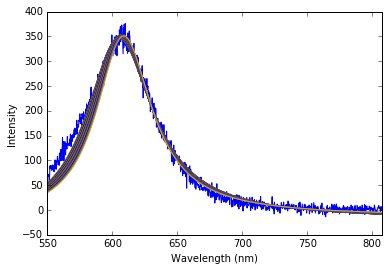

In [28]:
fig = plt.figure(figsize=(6,4), dpi=300)
plt.plot(wavelength, spec_532-spec_532_bkg)
for j in range(len(cut_wl)):
        plt.plot(wavelength, lorentziana(1239.8/wavelength, popt[0,j], popt[1,j], popt[2,j], popt[3,j]))

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.xlim((550,np.max(wavelength)))
plt.show()

[ 560.          561.02564103  562.05128205  563.07692308  564.1025641
  565.12820513  566.15384615  567.17948718  568.20512821  569.23076923
  570.25641026  571.28205128  572.30769231  573.33333333  574.35897436
  575.38461538  576.41025641  577.43589744  578.46153846  579.48717949
  580.51282051  581.53846154  582.56410256  583.58974359  584.61538462
  585.64102564  586.66666667  587.69230769  588.71794872  589.74358974
  590.76923077  591.79487179  592.82051282  593.84615385  594.87179487
  595.8974359   596.92307692  597.94871795  598.97435897  600.        ]
[  3.39904886e-03   3.27333721e-03   3.08380367e-03   2.94326079e-03
   2.78856314e-03   2.61328871e-03   2.40789927e-03   2.27881736e-03
   2.04015405e-03   1.86048480e-03   1.64664945e-03   1.39848662e-03
   1.17986066e-03   9.02361093e-04   5.91130570e-04   2.30048000e-04
   4.17260126e-05   4.15836624e-04   6.94362383e-04   8.94350756e-04
   1.28522110e-03   1.57598424e-03   1.91557048e-03   2.42850535e-03
   2.92086303e-03 

<function matplotlib.pyplot.show>

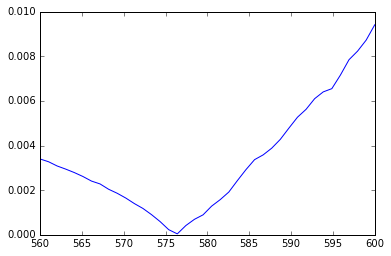

In [31]:
print(cut_wl)
print(abs(popt[1,:]-2.0459))
print(popt[1,:])

f = plt.figure()
plt.plot(cut_wl,abs(popt[1,:]-2.0459))
plt.show

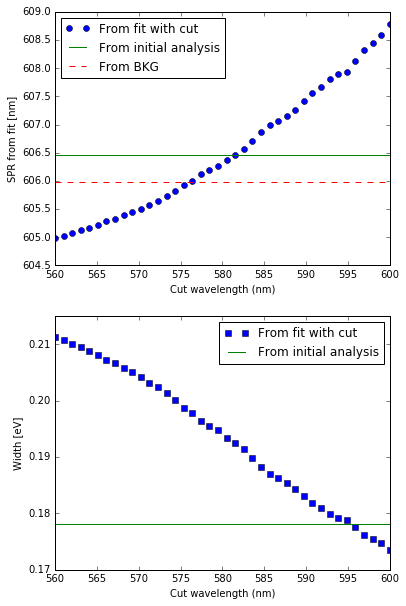

In [38]:
fig = plt.figure(figsize=(6,10), dpi=300)
nrows=2; ncols=1
ax0 = plt.subplot2grid((nrows, ncols), (0,0))
ax1 = plt.subplot2grid((nrows, ncols), (1,0))
#ax10 = plt.subplot2grid((nrows, ncols), (1,0))
#ax11 = plt.subplot2grid((nrows, ncols), (1,1))
ax0.plot(cut_wl,1239.8/popt[1,:],'o',label='From fit with cut')
ax0.plot(cut_wl,SPR*np.ones(len(cut_wl)),label='From initial analysis')
ax0.plot(cut_wl,605.98*np.ones(len(cut_wl)),'--',label='From BKG')
ax0.set_ylabel('SPR from fit [nm]')
ax0.set_xlabel('Cut wavelength (nm)')
ax0.legend(loc=2)

ax1.plot(cut_wl,2*np.sqrt(popt[2,:]),'s',label='From fit with cut')
ax1.plot(cut_wl,We*np.ones(len(cut_wl)),label='From initial analysis')
ax1.set_ylabel('Width [eV]')
ax1.set_xlabel('Cut wavelength (nm)')
ax1.legend(loc=1)

plt.show()

#fig = plt.figure(figsize=(4,3), dpi=300)
#plt.plot(cut_wl,popt[0,:])
#plt.title('Param 0')
#plt.xlabel('Cut wavelength (nm)')
#plt.show()

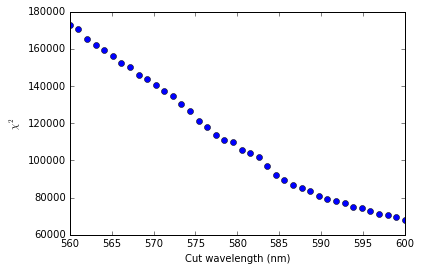

In [39]:
fig = plt.figure(figsize=(6,4), dpi=300)
plt.plot(cut_wl, perr,'o')
# plt.plot(cut_wl, len(wavelength)*np.ones(len(cut_wl)))
# plt.ylim((0,1e7))
plt.ylabel(r'$\chi^2$')
plt.xlabel('Cut wavelength (nm)')
plt.show()

In [50]:
# get the temp for each cut_w using the model
T = np.zeros((2,len(power_sp),len(cut_wl)))
eT = np.zeros((2,len(power_sp),len(cut_wl)))

r = np.logical_and(wavelength>590, wavelength<614)
for l_range in range(len(cut_wl)):
    P = popt[:,l_range]
    for s_633 in range(len(power_sp)):
        to_fit = spec_633[:,s_633]-spec_633_bkg[:,s_633]
        T[:,s_633,l_range], pcov = curve_fit(temp_fitting, 1239.8/wavelength[r], to_fit[r], [1, 300])
        eT[:,s_633,l_range] = np.sqrt(np.diag(pcov))
#         T2[:,s_633,l_range], pcov = curve_fit(temp_fitting2, 1239.8/wavelength[r], to_fit[r], 300)
print(T[1,1,:])
print(eT[1,1,:])


[ 375.46616971  375.73034382  376.12413789  376.42967011  376.78925409
  377.19985742  377.6659018   377.95022444  378.53869782  378.9845136
  379.51747809  380.13776496  380.68882804  381.46020327  382.28844397
  383.29505104  384.08384468  385.19024953  386.01756499  386.6263777
  387.86865031  388.82709212  389.96573913  391.70813456  393.47192165
  395.13062677  395.9203629   397.07645726  398.62444006  400.65487854
  402.73335728  404.24234062  406.31359336  407.69683929  408.36260717
  411.16853947  414.46341736  416.35400546  418.84612429  422.39118711]
[  7.75523627   7.76683038   7.78379348   7.7973936    7.80976006
   7.82893562   7.84348922   7.85594666   7.88165244   7.89958527
   7.92164175   7.94934406   7.97318591   8.00471604   8.04063122
   8.08477057   8.1195261    8.16710583   8.20464501   8.23145431
   8.28750239   8.33347846   8.38434364   8.46759354   8.54826208
   8.62472924   8.66096894   8.71915601   8.79616224   8.89612761
   8.99525712   9.07134586   9.171263

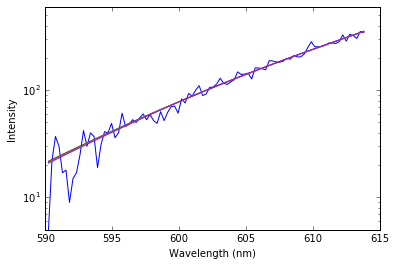

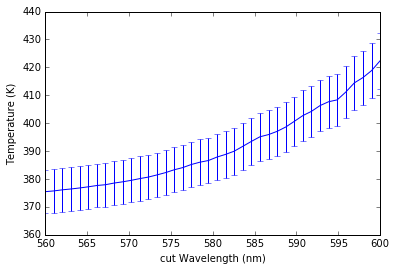

In [52]:
f2 = plt.figure(figsize=(6,4), dpi=600)   
plt.plot(wavelength[r], spec_633[r,1]-spec_633_bkg[r,1])
for l_range in range(0,len(cut_wl),10):
    P = popt[:,l_range] 
    plt.plot(wavelength[r], temp_fitting(1239.8/wavelength[r],T[0,1,l_range],T[1,1,l_range]))

plt.xlabel('Wavelength (nm)')
plt.ylabel('Intensity')
plt.yscale('log')
plt.ylim((0,600))
# plt.xlim((580,633))
plt.show()

f = plt.figure()
plt.errorbar(cut_wl,T[1,1,:],eT[1,1,:])
plt.xlabel('cut Wavelength (nm)')
plt.ylabel('Temperature (K)')
#plt.ylim((0,600))
#plt.xlim((580,633))
plt.show()


In [53]:
# caculate the mean
Tmed = np.zeros((len(power_sp)))
eTmed = np.zeros((len(power_sp)))
for l in range(len(power_sp)):
    Tmed[l] = np.mean(T[1,l,:])
    eTmed[l] = np.std(T[1,l,:])


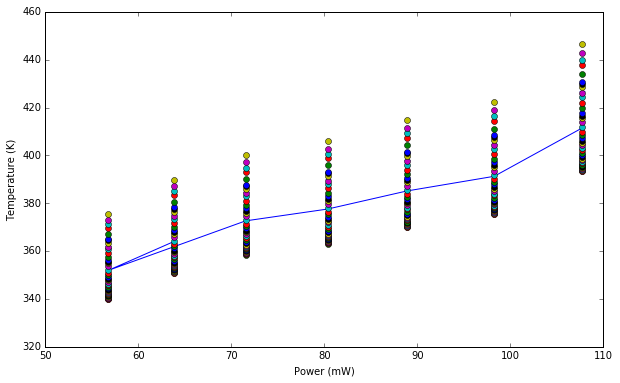

In [65]:
# plot temperature results
fig = plt.figure(figsize=(10,6), dpi=600)
# plt.subplot(2,1,1)
plt.errorbar(power_sp,Tmed,eTmed)
plt.xlabel('Power (mW)')
plt.ylabel('Temperature (K)')
# plt.show()

#fig = plt.figure(figsize=(6,4), dpi=300)
# plt.subplot(2,1,2)
plt.plot(power_sp[:], T[1,:,:],'o')
plt.xlabel('Power (mW)')
plt.ylabel('Temperature (K)')
plt.show()

# fig = plt.figure(figsize=(4,3), dpi=300)
# plt.plot(power_sp[:], T[0,:,:],'o')
# plt.xlabel('Power (mW)')
# plt.ylabel('Temperature (K)')
# plt.show()


## get room temperature

In [69]:
# get the room temperature
ext_T = np.zeros((len(cut_wl)))
e_ext_T = np.zeros((len(cut_wl)))
for l_range in range(len(cut_wl)):
    POL,cov = np.polyfit(power_sp[:], T[1,:,l_range], 1,cov=True)
    ext_T[l_range] = POL[1]
    e_ext_T[l_range] = np.sqrt(cov[1,1])

    
POL_mean,cov_mean = np.polyfit(power_sp[:], Tmed, 1,cov=True)    
print(POL_mean)
ePOL_mean = np.sqrt(np.diag(cov_mean))
print(ePOL_mean)

[   1.02663452  295.95379369]
[ 0.11548227  9.56430267]


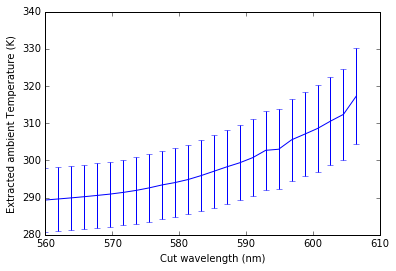

In [41]:
f = plt.figure(figsize=(6,4), dpi=600)
plt.errorbar(cut_wl,ext_T,yerr=e_ext_T)
plt.xlabel('Cut wavelength (nm)')
plt.ylabel('Extracted ambient Temperature (K)')
# plt.ylim((290,310))
# plt.show()
plt.savefig('03_Temp_Vs_Wl.svg')
plt.savefig('03_Temp_Vs_Wl.png')
plt.show()